<a href="https://colab.research.google.com/github/paramKeswani/LSTM-MODEL-STOCK-PREDICTION/blob/main/NIFITY_LSTM_LARGE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/Nifty2.csv')

In [ ]:
df.head()

,Date,HDFC,HUL,TATA STEEL,RELIANCE,NIFITY
0,30-07-2018,1416.849976,1688.699951,55.299999,1140.588379,11319.54981
1,31-07-2018,1434.199951,1731.650024,56.305000,1174.863525,11356.50000
2,01-08-2018,1446.150024,1734.300049,55.580002,1181.153809,11346.20020
3,02-08-2018,1430.250000,1748.500000,55.430000,1157.379150,11244.70020
4,03-08-2018,1433.599976,1763.000000,55.445000,1165.898438,11360.79981


In [ ]:
df.tail()

,Date,HDFC,HUL,TATA STEEL,RELIANCE,NIFITY
1227,20-07-2023,1688.750000,2703.250000,116.949997,2619.850098,19979.15039
1228,21-07-2023,1675.750000,2604.000000,116.599998,2538.750000,19745.00000
1229,24-07-2023,1678.400024,2580.250000,115.500000,2487.399902,19672.34961
1230,25-07-2023,1696.599976,2568.149902,119.250000,2485.800049,19680.59961
1231,26-07-2023,1690.699951,2583.300049,119.949997,2526.199951,19778.30078


In [ ]:
df1=df.reset_index()['NIFITY']

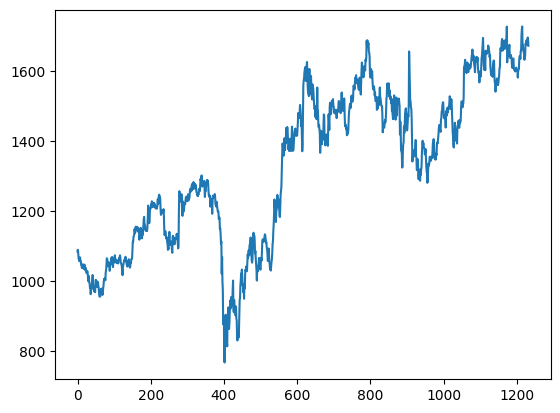

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so using MinMax scaler
import numpy as np

In [ ]:
### LSTM are sensitive to the scale of the data. so using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.29988921]
 [0.30287656]
 [0.30204384]
 ...
 [0.97519579]
 [0.97586279]
 [0.98376172]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(761, 100)
(761,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)


(269, 100)
(269,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
print(X_train)

[[[0.29988921]
  [0.30287656]
  [0.30204384]
  ...
  [0.24684894]
  [0.25221317]
  [0.25625154]]

 [[0.30287656]
  [0.30204384]
  [0.29383778]
  ...
  [0.25221317]
  [0.25625154]
  [0.26272751]]

 [[0.30204384]
  [0.29383778]
  [0.30322419]
  ...
  [0.25625154]
  [0.26272751]
  [0.26294171]]

 ...

 [[0.75356745]
  [0.76982989]
  [0.76530651]
  ...
  [0.84912971]
  [0.83500959]
  [0.82034374]]

 [[0.76982989]
  [0.76530651]
  [0.77807243]
  ...
  [0.83500959]
  [0.82034374]
  [0.80903719]]

 [[0.76530651]
  [0.77807243]
  [0.78530421]
  ...
  [0.82034374]
  [0.80903719]
  [0.77119625]]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, ytest),
    epochs=100,
    batch_size=64,
    verbose=1
)

Epoch 1/100
12/12 [==============================] - 7s 215ms/step - loss: 0.0534 - val_loss: 0.0697
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0128 - val_loss: 0.0017
Epoch 3/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0061 - val_loss: 0.0124
Epoch 4/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0014 - val_loss: 9.8954e-04
Epoch 10/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0014 - va

In [ ]:
import tensorflow as tf

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 1s 52ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13285.082409578683

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))


17846.89633344208

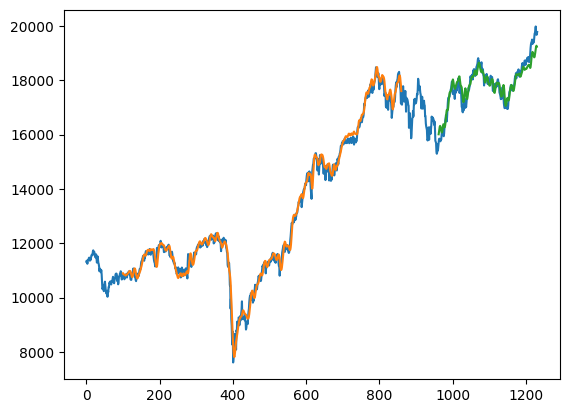

In [ ]:

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()